### 代码实现

In [127]:
# 导入必要的库
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义超参数
num_samples = 30 # 样本数
hidden_size = 256 # 隐藏层大小
num_epochs = 500  # 训练轮数

### 数据生成

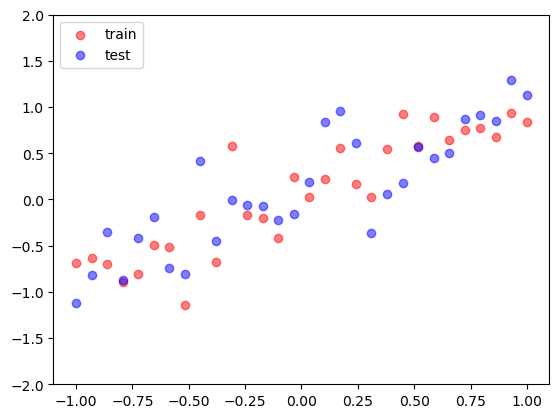

In [128]:
# 随机数种子
torch.manual_seed(2333)
# 生成训练集
# 生成x值: linspace在-1到1之间均匀生成num_samples个点，生成的张量形状为[num_samples]
# unsqueeze(1)在第1维（索引为1的维度）增加一个维度
# 例如: 原始张量[a,b,c] -> unsqueeze(1) -> [[a],[b],[c]]
# 这里是为了将形状从[num_samples]变为[num_samples,1]，因为每个样本需要是一个列向量
x_train = torch.unsqueeze(torch.linspace(-1, 1, num_samples), 1)  
y_train = x_train + 0.3 * torch.randn(num_samples, 1)

# 测试集
x_test = torch.unsqueeze(torch.linspace(-1, 1, num_samples), 1)
y_test = x_test + 0.3 *  torch.randn(num_samples, 1)

# 绘制训练集和测试集
plt.scatter(x_train, y_train, c='r', alpha=0.5, label='train')
plt.scatter(x_test, y_test, c='b', alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2, 2))
plt.show()

### 模型定义

In [129]:
# 定义一个可能会过拟合的网络
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
)

# 定义一个包含 Dropout 的网络
net_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, hidden_size),
    torch.nn.Dropout(0.5),  # p=0.5
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.Dropout(0.5),  # p=0.5
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, 1),
)

### 模型训练

In [130]:
# 定义优化器和损失函数
optimizer_overfitting = torch.optim.Adam(net_overfitting.parameters(), lr=0.001)
optimizer_dropout = torch.optim.Adam(net_dropout.parameters(), lr=0.001)

# 损失函数
criterion = nn.MSELoss()

# 分别进行训练
for i in range(num_epochs):
    # overfitting的网络：预测、损失函数、反向传播
    pred_overfitting = net_overfitting(x_train)
    loss_overfitting = criterion(pred_overfitting, y_train)
    optimizer_overfitting.zero_grad()
    loss_overfitting.backward()
    optimizer_overfitting.step()
    
    # 包含dropout的网络：预测、损失函数、反向传播
    pred_dropout = net_dropout(x_train)
    loss_dropout = criterion(pred_dropout, y_train)
    optimizer_dropout.zero_grad()
    loss_dropout.backward()
    optimizer_dropout.step()

### 预测和可视化

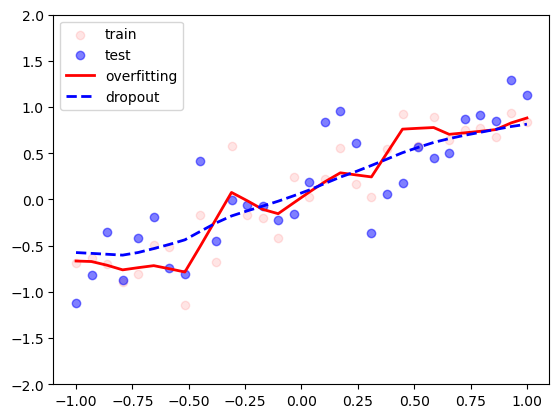

In [ ]:
# 在测试过程中不使用 Dropout
net_overfitting.eval()
net_dropout.eval()

# 预测
test_pred_overfitting = net_overfitting(x_test)
test_pred_dropout = net_dropout(x_test)

# 绘制拟合效果
plt.scatter(x_train, y_train, c='r', alpha=0.1, label='train')
plt.scatter(x_test, y_test, c='b', alpha=0.5, label='test')
plt.plot(x_test, test_pred_overfitting.data.numpy(), 'r-', lw=2, label='overfitting')
plt.plot(x_test, test_pred_dropout.data.numpy(), 'b--', lw=2, label='dropout')
plt.legend(loc='upper left')
plt.ylim((-2, 2))
plt.show()
# 可以看到dropout网络有效缓解了在测试集上的过拟合现象